In [37]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
import os
import pandas as pd
#data = os.path.join("news.csv")
#movie_data = os.path.join( "gdrive/My\ Drive/research/research2.0/projects/mkali/mazoezi/movie_data.csv")

In [58]:
data = pd.read_csv('news.csv')
data.head()

,id,company,country,sector,theme,event_indicator_name,answer_category,number_incidents_in_chain,incident_title,incident_type,publication_date,source,description,location,incident_date
0,0,3i Group PLC,United Kingdom,Consumer Discretionary,Social,Social Impact of Products,Category 1,2,Action offers remedy participants of 2015 job ...,NewsUpdate,16/03/2017,Company feedback,"3i, which manages 75% of the shares of Dutch r...",Belgium,15/03/2017
1,1,3M Co,United States,Consumer Discretionary,Environment,"Emissions, Effluents and Waste",Category 3,2,Airservices find high levels of chemicals in a...,InitialIncident,31/07/2018,ABC News,The Airservices Australia tested 150 firefight...,Australia,31/07/2018
2,2,3M Co,United States,Consumer Discretionary,Environment,"Emissions, Effluents and Waste",Category 3,2,Sydney aquifer contaminated with toxic chemicals,IncidentUpdate,23/12/2018,Sydney Morning Herald,Australian media outlets disclosed that the aq...,"Sydney NSW, Australia",23/12/2018
3,3,3M Co,United States,Consumer Discretionary,Environment,"Emissions, Effluents and Waste",Category 3,1,Alabama seeks to fine 3M for violating the lim...,InitialIncident,20/02/2017,Decatur Daily,The Alabama Department of Environmental Manage...,United States,20/02/2017
4,4,3M Co,United States,Consumer Discretionary,Social,Quality and Safety,Category 3,1,Alleged faults at the company's electronic ank...,InitialIncident,6/4/2017,Bloomberg,3M Company has come under scrutiny for alleged...,United States,6/4/2017


In [40]:
import nltk
from nltk.tokenize import word_tokenize
descriptions = data.description.str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(descriptions)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

47702


['the',
 '.',
 ',',
 'to',
 'and',
 'of',
 'in',
 'a',
 'that',
 'The',
 'for',
 '’',
 '(',
 ')',
 'by',
 's',
 'was',
 'company',
 'with',
 'USD',
 'its',
 'it',
 'on',
 'lawsuit',
 'from',
 'million',
 'an',
 'not',
 'were',
 'as',
 'filed',
 'stated',
 'against',
 'companies',
 'According',
 'at',
 'which',
 'is',
 'US',
 'after',
 "'s",
 'their',
 'investigation',
 'including',
 'also',
 'report',
 '2017',
 'alleged',
 'between',
 'claimed']

In [11]:
!pip install --upgrade pip

     |████████████████████████████████| 1.4MB 2.1MB/s eta 0:00:01     |██▎                             | 102kB 2.1MB/s eta 0:00:01              | 532kB 2.1MB/s eta 0:00:01
  Found existing installation: pip 19.2.2
    Uninstalling pip-19.2.2:
      Successfully uninstalled pip-19.2.2


In [41]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

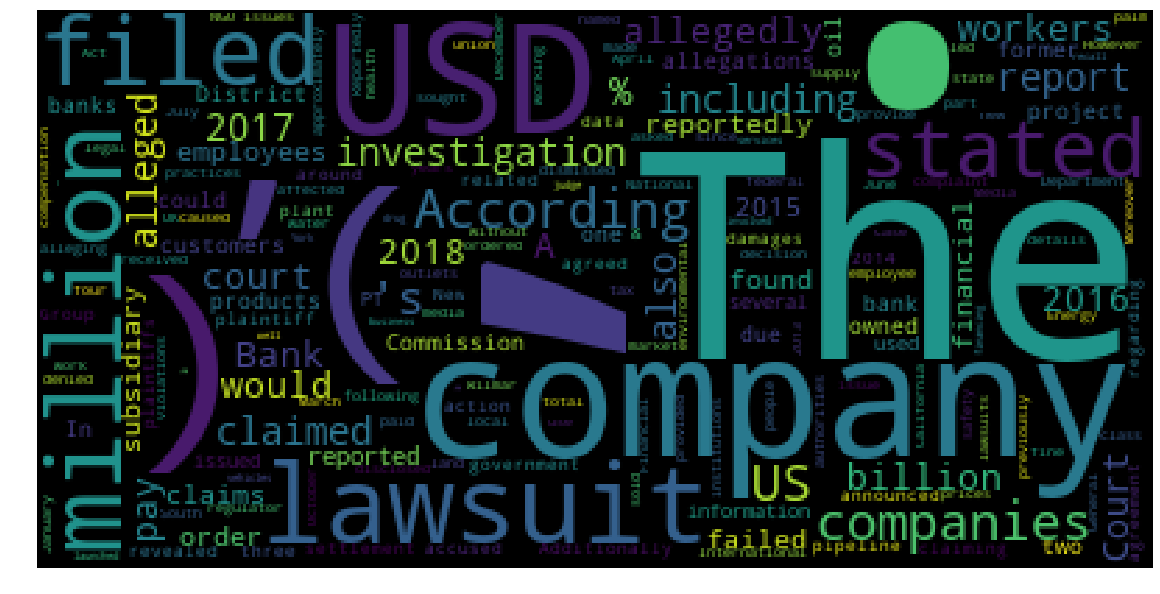

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 14), dpi=80, facecolor='w', edgecolor='k')


frequency_dist = nltk.FreqDist(tokens)
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [59]:
features = data.description.values
labels = data.theme.values
labels

array(['Social', 'Environment', 'Environment', ..., 'Social',
       'Governance', 'Social'], dtype=object)

In [61]:
labels = labels.reshape(-1, 1)
labels.shape

(20915, 1)

In [62]:
from sklearn.preprocessing import OneHotEncoder 
  
# creating one hot encoder object with categorical feature 0 
# indicating the first column 
onehotencoder = OneHotEncoder() 
labels = onehotencoder.fit_transform(labels).toarray()
labels.shape

(20915, 3)

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features, labels, test_size =0.20,random_state = 2)

In [64]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences


tokenizer_obj = Tokenizer()


#pad sequences
max_length = max([len(s.split()) for s in features])

#define vocabulary size
vocab_size = len(tokenizer_obj.word_index) + 1

X_train_tokens = tokenizer_obj.texts_to_sequences(X_train)
X_test_tokens = tokenizer_obj.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_tokens,maxlen=max_length,padding='post')
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_length, padding='post')

In [65]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,GRU
from keras.layers.embeddings import Embedding

EMBEDDING_DIM = 100

print("Build model...")

model = Sequential()
model.add(Embedding(vocab_size,EMBEDDING_DIM,input_length=max_length))
model.add(GRU(units = 32,dropout = 0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation = 'softmax'))

#try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


Build model...


In [66]:
#converting labels to one hot encoding for neural net classfication
from keras.utils import to_categorical
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)


print('Train...')
model.fit(X_train_pad,y_train,batch_size=128,epochs=25,validation_data=(X_test_pad,y_test),verbose=2)


Train...
Train on 16732 samples, validate on 4183 samples
Epoch 1/25
 - 149s - loss: 0.9231 - acc: 0.6199 - val_loss: 0.9140 - val_acc: 0.6247
Epoch 2/25
 - 128s - loss: 0.9106 - acc: 0.6268 - val_loss: 0.9142 - val_acc: 0.6247
Epoch 3/25
 - 130s - loss: 0.9107 - acc: 0.6268 - val_loss: 0.9140 - val_acc: 0.6247
Epoch 4/25
 - 138s - loss: 0.9116 - acc: 0.6268 - val_loss: 0.9139 - val_acc: 0.6247
Epoch 5/25
 - 131s - loss: 0.9104 - acc: 0.6268 - val_loss: 0.9146 - val_acc: 0.6247
Epoch 6/25
 - 126s - loss: 0.9112 - acc: 0.6268 - val_loss: 0.9142 - val_acc: 0.6247
Epoch 7/25
 - 125s - loss: 0.9106 - acc: 0.6268 - val_loss: 0.9140 - val_acc: 0.6247
Epoch 8/25
 - 124s - loss: 0.9104 - acc: 0.6268 - val_loss: 0.9142 - val_acc: 0.6247
Epoch 9/25
 - 122s - loss: 0.9100 - acc: 0.6268 - val_loss: 0.9144 - val_acc: 0.6247
Epoch 10/25
 - 123s - loss: 0.9109 - acc: 0.6268 - val_loss: 0.9165 - val_acc: 0.6247
Epoch 11/25
 - 125s - loss: 0.9109 - acc: 0.6268 - val_loss: 0.9140 - val_acc: 0.6247
Epoch

In [71]:
test_descriptions = data['description'][0]

In [81]:
# predicting the test set

test_samples_tokens = tokenizer_obj.texts_to_sequences(test_descriptions)
test_samples_tokens_pad = pad_sequences(test_samples_tokens,maxlen=max_length)
y = model.predict(x=test_samples_tokens_pad)